TSNE and PCA
===
1. Importing relevant libraries
2. obtain data from pickle file and show the shape of data
3. Use `sklearn` to apply PCA and TSNE dimensionality-reduction to reduce the input dimensions to 2
4. Plot the PCA and TSNE plots for 2 dimensions and analyse the same


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# sns.set_theme('notebook')
sns.set_style('white')

In [2]:
with open('./data/mnist_small.pkl', 'rb') as f:
    data = pickle.load(f)

print(f"X shape: {data['X'].shape}")
print(f"Y shape: {data['Y'].shape}")

X shape: (10000, 784)
Y shape: (10000, 1)


Text(0.5, 1.0, 'TSNE with 2 components')

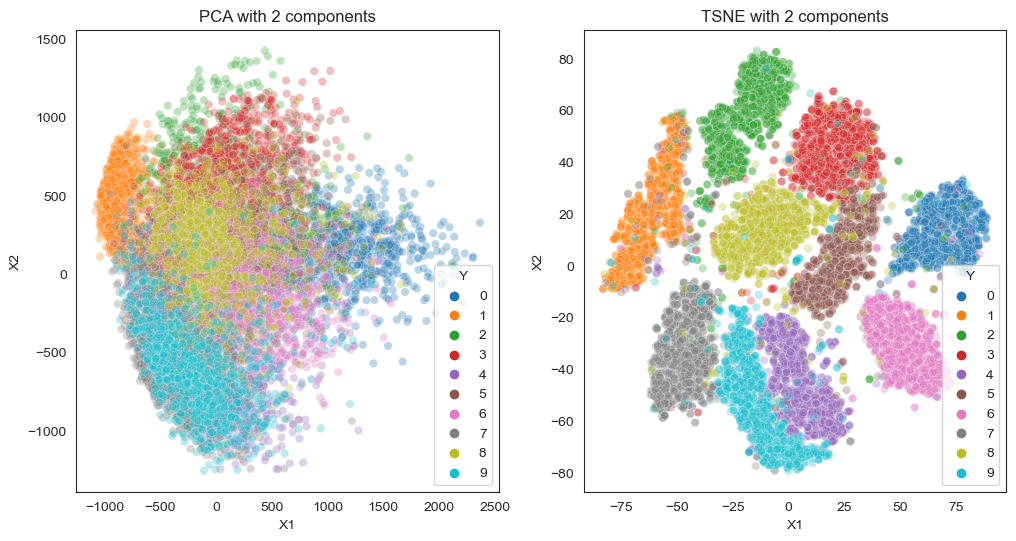

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data['X'], data['Y'])

pca_df = pd.DataFrame(columns=['X1', 'X2', 'Y'])
pca_df['X1'] = X_pca[:, 0]
pca_df['X2'] = X_pca[:, 1]
pca_df['Y'] = data['Y']

sns.scatterplot(data=pca_df, x='X1', y='X2', hue='Y', alpha=0.3, palette=sns.color_palette(), ax=ax[0])
ax[0].set_title("PCA with 2 components")

#T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data['X'], data['Y'])

tsne_df = pd.DataFrame(columns=['X1', 'X2', 'Y'])
tsne_df['X1'] = X_tsne[:, 0]
tsne_df['X2'] = X_tsne[:, 1]
tsne_df['Y'] = data['Y']

sns.scatterplot(data=tsne_df, x='X1', y='X2', hue='Y', alpha=0.3, palette=sns.color_palette(), ax=ax[1])
ax[1].set_title("TSNE with 2 components")
# plt.savefig('./hw2/images/pca-tsne.pdf', bbox_inches='tight')

#### Observation
TSNE is able to make clusters which are naturally observable on 2 dimensions in a better way compared to PCA. In PCA, we can see significant overlap and mixing of points from different clusters. Thus, TSNE is a better projection technique to visualize high-dimensional data.